In [1]:
#install and download needed packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import scipy
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, StackingRegressor,BaggingRegressor,GradientBoostingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict,KFold
from sklearn.metrics import mean_squared_error,accuracy_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.decomposition import PCA
import statsmodels.api as sm
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv('NVDA.csv')

In [3]:
data.shape 

(6290, 7)

In [4]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-02-25,0.515625,0.531250,0.471354,0.479167,0.439562,14913600
1,1999-02-26,0.484375,0.500000,0.453125,0.457031,0.419255,17260800
2,1999-03-01,0.468750,0.479167,0.437500,0.459635,0.421644,9216000
3,1999-03-02,0.458333,0.460938,0.447917,0.455729,0.418061,5524800
4,1999-03-03,0.458333,0.458333,0.421875,0.424479,0.389394,6139200


In [5]:
data.index 

RangeIndex(start=0, stop=6290, step=1)

In [6]:
data=data.rename(columns={'Date':'date','Open':'open','High':'high','Low':'low','Close':'close','Volume':'volume'})

In [7]:
data=data.drop(columns=['Adj Close'],axis=1)

In [8]:
data['date']=pd.to_datetime(data['date'])

In [9]:
data.set_index('date', inplace=True)

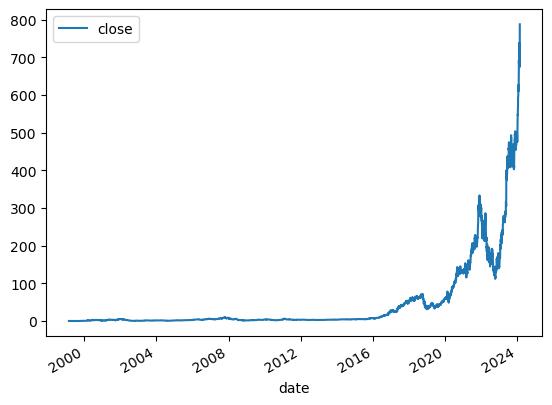

In [10]:
data.plot.line(y='close', use_index=True)
plt.savefig('NVDA.png');

In [11]:
data.describe()

,open,high,low,close,volume
count,6290.000000,6290.000000,6290.000000,6290.000000,6.290000e+03
mean,45.782461,46.614356,44.928190,45.819861,6.100886e+07
std,99.266056,101.004326,97.460823,99.374162,4.342013e+07
min,0.348958,0.355469,0.333333,0.341146,1.968000e+06
25%,2.766250,2.852917,2.685000,2.755573,3.487050e+07
50%,4.512500,4.586666,4.440000,4.513333,5.112330e+07
75%,39.270625,39.886250,38.451249,39.274376,7.403648e+07
max,807.900024,823.940002,775.700012,788.169983,9.230856e+08


In [11]:
data['Tomorrow']=data['close'].shift(-1)

In [12]:
data.head() 

,open,high,low,close,volume,Tomorrow
date,,,,,,
1999-02-25,0.515625,0.531250,0.471354,0.479167,14913600,0.457031
1999-02-26,0.484375,0.500000,0.453125,0.457031,17260800,0.459635
1999-03-01,0.468750,0.479167,0.437500,0.459635,9216000,0.455729
1999-03-02,0.458333,0.460938,0.447917,0.455729,5524800,0.424479
1999-03-03,0.458333,0.458333,0.421875,0.424479,6139200,0.415365


In [13]:
data['previousday']=data['close'].shift(1)

In [14]:
data.head()

,open,high,low,close,volume,Tomorrow,previousday
date,,,,,,,
1999-02-25,0.515625,0.531250,0.471354,0.479167,14913600,0.457031,NaN
1999-02-26,0.484375,0.500000,0.453125,0.457031,17260800,0.459635,0.479167
1999-03-01,0.468750,0.479167,0.437500,0.459635,9216000,0.455729,0.457031
1999-03-02,0.458333,0.460938,0.447917,0.455729,5524800,0.424479,0.459635
1999-03-03,0.458333,0.458333,0.421875,0.424479,6139200,0.415365,0.455729


In [15]:
train = data.iloc[:-1000]
test = data.iloc[-1000:]

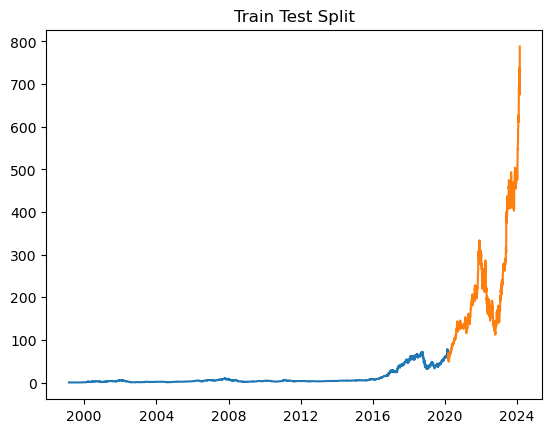

In [16]:
import matplotlib.pyplot as plt 
plt.plot(train['close'], label='train')
plt.plot(test['close'], label='test')
plt.title('Train Test Split');

In [17]:
# Utility function
def evaluate_model(model, x, y):
    """
    Utility function to print the model performance, (MAE and MAPE)
    model: Fitted model
    x:  features dataset
    y:  target values
    """
    predicted = model.predict(x) #get predictions
    mae = mean_absolute_error(y_true=y, y_pred=predicted)
    abs_errors= np.abs(np.array(predicted) - np.array(y))
    min_abs_errors= np.min(abs_errors)
    max_abs_errors= np.max(abs_errors)
    med_abs_errors= np.median(abs_errors)
    mape = mean_absolute_percentage_error(y, predicted)

    print('MAE: {:.2f}'.format(mae))
    print('MAPE: {:.2f}'.format(mape))
    print('minae: {:.2f}'.format(min_abs_errors))
    print('maxae: {:.2f}'.format(max_abs_errors))
    print('medae: {:.2f}'.format(med_abs_errors))
    print()

In [18]:
#predictors_1 = ["close", "volume", "open", "high", "low"]
predictors_2 = ["volume", "open", "high", "low"]

In [19]:
# creating a dictionary of Regressors to be experimented on.
models_dict = {
          'RF Regressor':RandomForestRegressor(random_state=0),
          'xgboost': XGBRegressor(),'Gradient Boost': GradientBoostingRegressor(random_state=0),
    'Catboostregressor':CatBoostRegressor(iterations=100, early_stopping_rounds=50)
         }

#looping through all the regressors, fitting and evaluating them on  test data respectively
for key, model in models_dict.items():
    model.fit(train[predictors_2], train['close'])
    print(f'Performance of "{key}" on Validation and Test set:')
    print('=='*28)
    print ( 'Test set:')
    print("**"*8)
    evaluate_model(model,test[predictors_2], test['close'])





Performance of "RF Regressor" on Validation and Test set:
Test set:
****************
MAE: 155.95
MAPE: 0.56
minae: 0.14
maxae: 710.81
medae: 110.45

Performance of "xgboost" on Validation and Test set:
Test set:
****************
MAE: 155.15
MAPE: 0.56
minae: 0.06
maxae: 710.48
medae: 109.42

Performance of "Gradient Boost" on Validation and Test set:
Test set:
****************
MAE: 155.11
MAPE: 0.56
minae: 0.01
maxae: 709.92
medae: 109.46

Learning rate set to 0.346326
0:	learn: 11.0954651	total: 139ms	remaining: 13.8s
1:	learn: 7.4961113	total: 143ms	remaining: 6.99s
2:	learn: 5.1544424	total: 145ms	remaining: 4.7s
3:	learn: 3.5338035	total: 149ms	remaining: 3.56s
4:	learn: 2.4729997	total: 151ms	remaining: 2.88s
5:	learn: 1.8039399	total: 154ms	remaining: 2.42s
6:	learn: 1.3833106	total: 157ms	remaining: 2.09s
7:	learn: 1.1098487	total: 159ms	remaining: 1.83s
8:	learn: 0.9609885	total: 161ms	remaining: 1.63s
9:	learn: 0.8826473	total: 164ms	remaining: 1.48s
10:	learn: 0.8137048	total

#### Retrain the best Model(Extreme Gradient Boosting)

In [20]:
model= GradientBoostingRegressor()
model.fit(train[predictors_2], train['close'])
pred= model.predict(test[predictors_2])

In [21]:

pred= pd.Series(pred, index=test.index)
combined_2= pd.concat([test['close'], pred],axis=1)

In [22]:
#combined_1.plot();
combined_2

,close,0
date,,
2020-03-05,68.322502,69.928087
2020-03-06,66.510002,65.569953
2020-03-09,61.360001,62.069828
2020-03-10,65.269997,62.423815
2020-03-11,61.617500,62.235392
...,...,...
2024-02-16,726.130005,78.199821
2024-02-20,694.520020,78.334269
2024-02-21,674.719971,78.334269


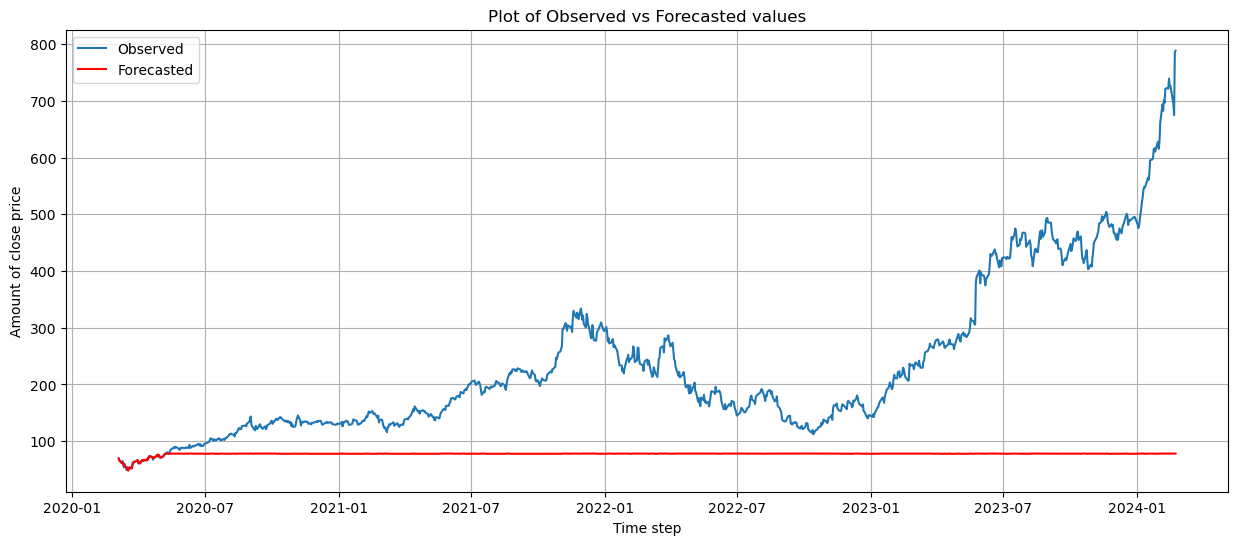

In [23]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined_2['close'], label='Observed')
plt.plot(combined_2[0], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

In [24]:
#add additional predictors to the model
#calculate the mean close price in certain days and  find the ratio between today's closing price and that of the periods
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = data.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    data[ratio_column] = data["close"] / rolling_averages["close"]
    
    trend_column = f"Trend_{horizon}"
    data[trend_column] = data.shift(1).rolling(horizon).sum()["close"]
    
    
    
    new_predictors+= [ratio_column, trend_column]

In [25]:
data['mom'] = data['close'].pct_change(12) # 12 month change

In [26]:
#Create the RSI indicator
#data['rsi' + str(n)] = talib.RSI(data['close'].values, timeperiod=horizon)
def computeRSI (data, time_window):
    diff = data.diff(1).dropna()        # diff in one field(one day)

    #this preservers dimensions off diff values
    up_chg = 0 * diff
    down_chg = 0 * diff
    
    # up change is equal to the positive difference, otherwise equal to zero
    up_chg[diff > 0] = diff[ diff>0 ]
    
    # down change is equal to negative deifference, otherwise equal to zero
    down_chg[diff < 0] = diff[ diff < 0 ]
    
    
    # we set com=time_window-1 so we get decay alpha=1/time_window
    up_chg_avg   = up_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    down_chg_avg = down_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    
    rs = abs(up_chg_avg/down_chg_avg)
    rsi = 100 - 100/(1+rs)
    return rsi

In [27]:
data['RSI']= computeRSI(data['close'], 14)

In [28]:
data.head()

,open,high,low,close,volume,Tomorrow,previousday,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000,mom,RSI
date,,,,,,,,,,,,,,,,,,,
1999-02-25,0.515625,0.531250,0.471354,0.479167,14913600,0.457031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-02-26,0.484375,0.500000,0.453125,0.457031,17260800,0.459635,0.479167,0.976355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-03-01,0.468750,0.479167,0.437500,0.459635,9216000,0.455729,0.457031,1.002841,0.936198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-03-02,0.458333,0.460938,0.447917,0.455729,5524800,0.424479,0.459635,0.995733,0.916666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-03-03,0.458333,0.458333,0.421875,0.424479,6139200,0.415365,0.455729,0.964497,0.915364,0.932494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
data.shape 

(6290, 19)

In [30]:
new_data=data[new_predictors]
new_data['close']=data['close']
new_data['MOM']=data['mom']
new_data.head()

,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000,close,MOM
date,,,,,,,,,,,,
1999-02-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.479167,NaN
1999-02-26,0.976355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.457031,NaN
1999-03-01,1.002841,0.936198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.459635,NaN
1999-03-02,0.995733,0.916666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.455729,NaN
1999-03-03,0.964497,0.915364,0.932494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.424479,NaN


In [31]:
new_data['SMA_3'] = new_data.iloc[:,10].rolling(window=3).mean()
new_data['SMA_4'] = new_data.iloc[:,10].rolling(window=4).mean()

In [32]:
new_data['CMA_4'] = new_data['close'].expanding(min_periods=4).mean()

In [33]:
new_data['EMA'] = new_data.iloc[:,10].ewm(span=40,adjust=False).mean()

In [34]:
new_data=new_data.dropna()
new_data.shape 

(5290, 16)

In [35]:
new_data.head()

,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000,close,MOM,SMA_3,SMA_4,CMA_4,EMA
date,,,,,,,,,,,,,,,,
2003-02-19,1.004691,2.064166,1.122467,4.507499,1.030845,62.496661,0.592149,455.400001,0.506800,2112.336864,1.070833,0.245155,1.045000,0.989375,2.111296,0.945335
2003-02-20,1.000000,2.131666,1.064799,4.769999,1.035399,62.327494,0.596223,452.095834,0.506653,2112.928530,1.070833,0.221482,1.067500,1.051458,2.110258,0.951457
2003-02-21,1.000389,2.141666,1.015317,5.028332,1.040201,62.053327,0.601260,449.006667,0.506901,2113.542332,1.071667,0.279602,1.071111,1.068541,2.109223,0.957321
2003-02-24,1.006182,2.142500,1.012284,5.277499,1.057806,61.814994,0.613557,445.592501,0.513055,2114.154364,1.085000,0.284024,1.075833,1.074583,2.108202,0.963549
2003-02-25,0.996918,2.156667,1.002790,5.359166,1.055465,61.542494,0.614444,442.094168,0.509745,2114.783635,1.078333,0.266144,1.078333,1.076458,2.107178,0.969148


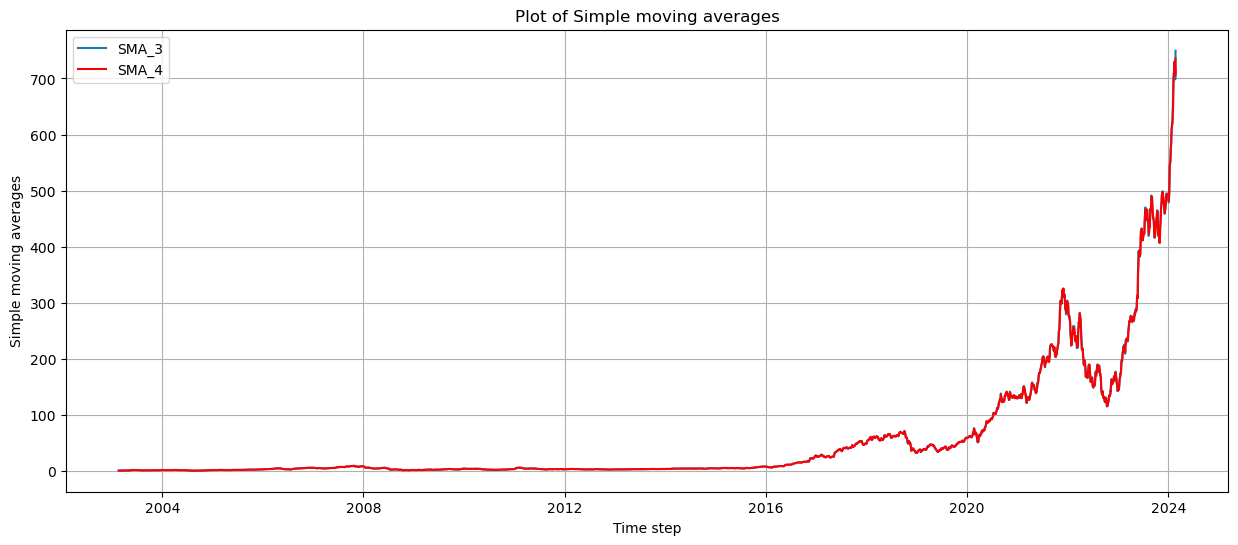

In [36]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['SMA_3'], label='SMA_3')
plt.plot(new_data['SMA_4'], color='r', label='SMA_4')
plt.title('Plot of Simple moving averages')
plt.ylabel('Simple moving averages')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

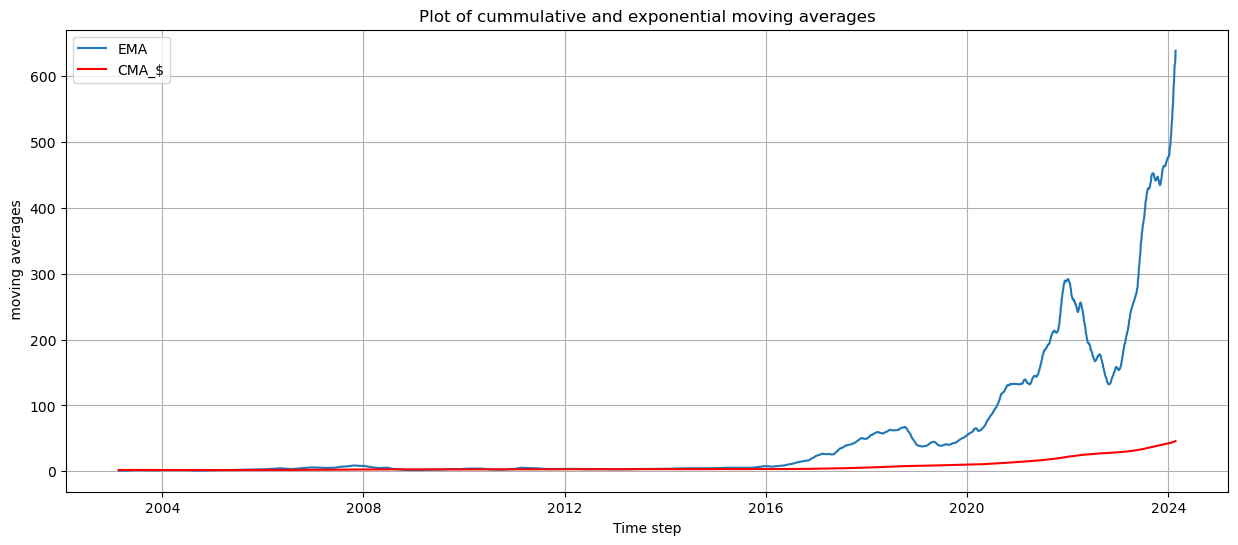

In [37]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['EMA'], label='EMA')
plt.plot(new_data['CMA_4'], color='r', label='CMA_$')
plt.title('Plot of cummulative and exponential moving averages')
plt.ylabel(' moving averages')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

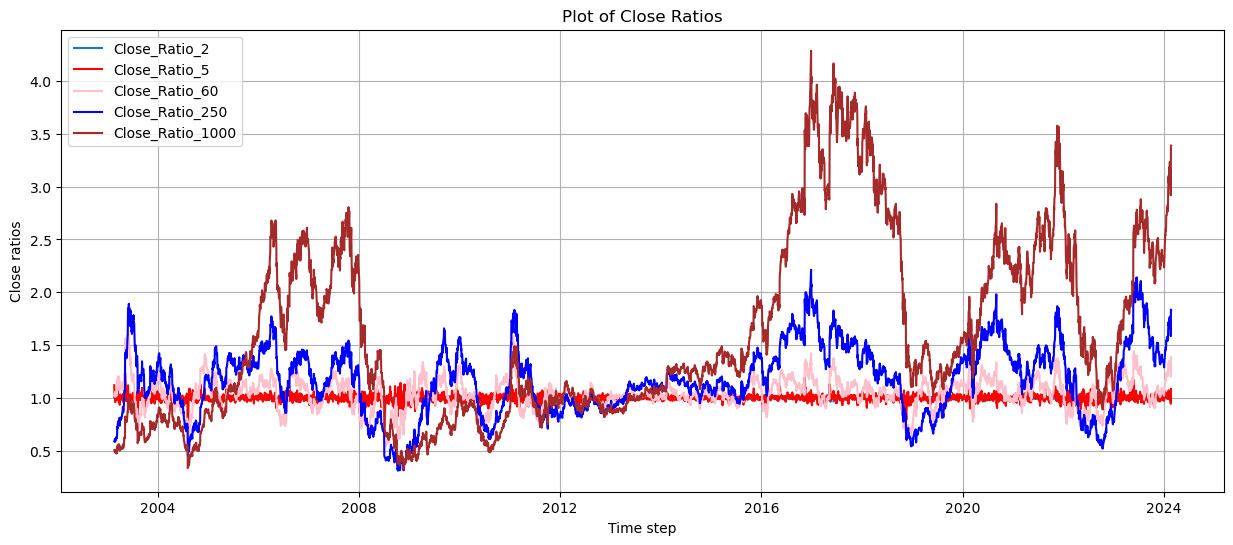

In [38]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['Close_Ratio_2'], label='Close_Ratio_2')
plt.plot(new_data['Close_Ratio_5'], color='r', label='Close_Ratio_5')
plt.plot(new_data['Close_Ratio_60'], color='pink', label='Close_Ratio_60')
plt.plot(new_data['Close_Ratio_250'], color='b', label='Close_Ratio_250')
plt.plot(new_data['Close_Ratio_1000'], color='brown', label='Close_Ratio_1000')
#plt.plot(new_data['close'], color='g', label='Close_Ratio_2')
plt.title('Plot of Close Ratios')
plt.ylabel('Close ratios')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

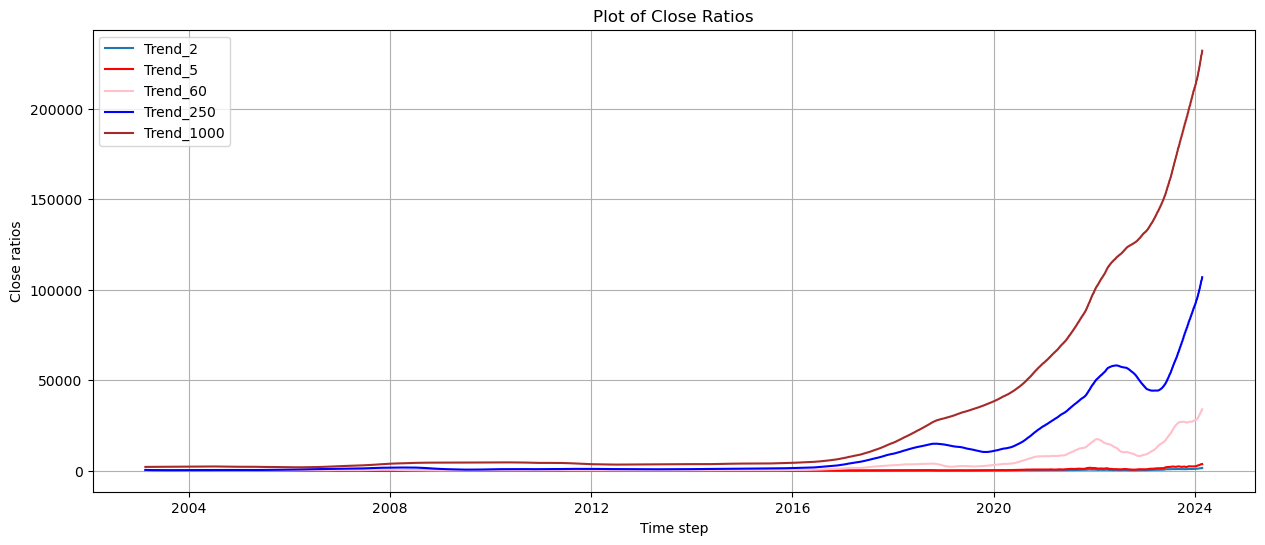

In [39]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['Trend_2'], label='Trend_2')
plt.plot(new_data['Trend_5'], color='r', label='Trend_5')
plt.plot(new_data['Trend_60'], color='pink', label='Trend_60')
plt.plot(new_data['Trend_250'], color='b', label='Trend_250')
plt.plot(new_data['Trend_1000'], color='brown', label='Trend_1000')
#plt.plot(new_data['close'], color='g', label='Close_Ratio_2')
plt.title('Plot of Close Ratios')
plt.ylabel('Close ratios')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

In [40]:
new_data['RSI']=data['RSI']

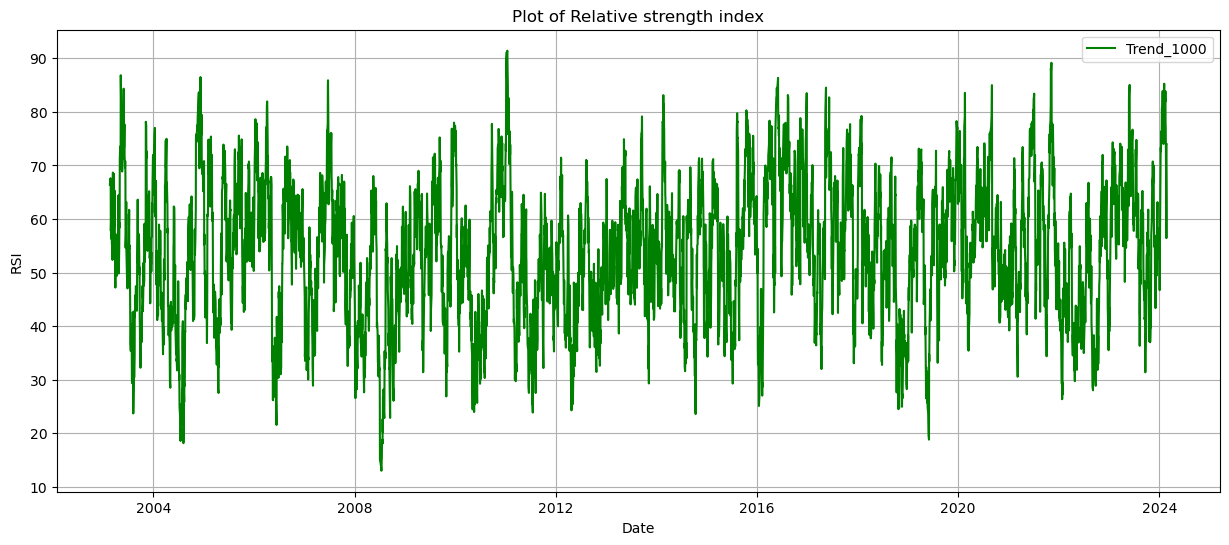

In [41]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['RSI'], color='g', label='Trend_1000')
#plt.plot(new_data['close'], color='g', label='Close_Ratio_2')
plt.title('Plot of Relative strength index')
plt.ylabel('RSI')
plt.xlabel('Date')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

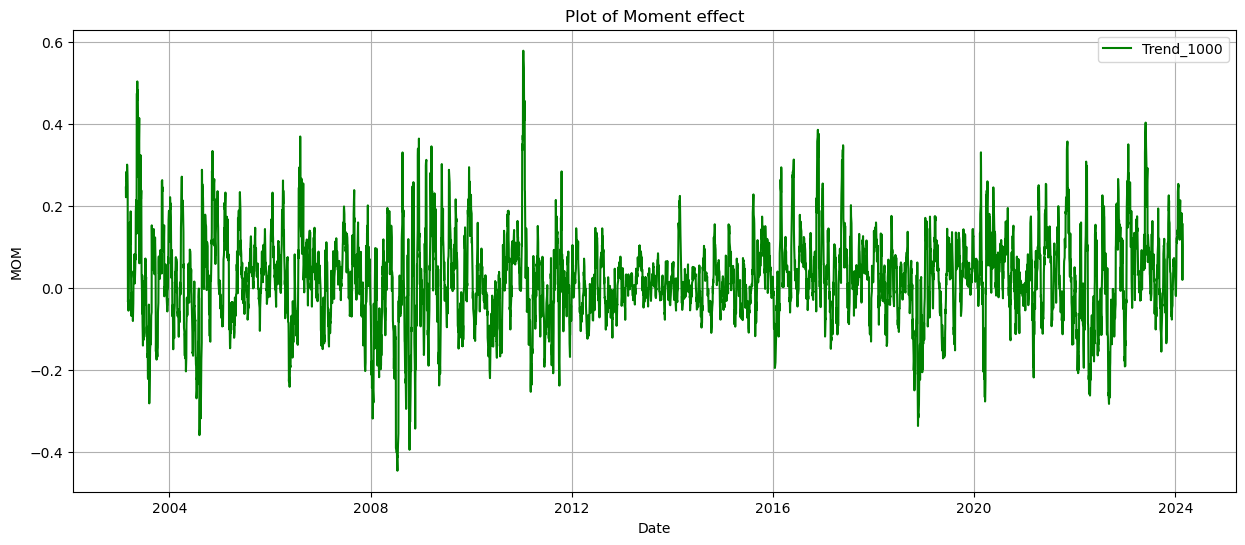

In [42]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['MOM'], color='g', label='Trend_1000')
#plt.plot(new_data['close'], color='g', label='Close_Ratio_2')
plt.title('Plot of Moment effect')
plt.ylabel('MOM')
plt.xlabel('Date')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

In [43]:
new_data['previousday']=data['previousday']

In [44]:
train = new_data.iloc[:-1000]
test = new_data.iloc[-1000:]

In [45]:
train.shape

(4290, 18)

In [46]:
new_data.columns

Index(['Close_Ratio_2', 'Trend_2', 'Close_Ratio_5', 'Trend_5',
       'Close_Ratio_60', 'Trend_60', 'Close_Ratio_250', 'Trend_250',
       'Close_Ratio_1000', 'Trend_1000', 'close', 'MOM', 'SMA_3', 'SMA_4',
       'CMA_4', 'EMA', 'RSI', 'previousday'],
      dtype='object')

In [47]:
predictors= ['SMA_3','SMA_4','EMA','RSI','MOM','previousday'] 

#### Retrain the models on the new predictors

In [48]:
# creating a dictionary of Regressors to be experimented on.
models_dict = {
          'RF Regressor':RandomForestRegressor(random_state=0),
          'xgboost': XGBRegressor(),'Gradient Boost': GradientBoostingRegressor(random_state=0),
    'Catboostregressor':CatBoostRegressor(iterations=100, early_stopping_rounds=50)
         }

#looping through all the regressors, fitting and evaluating them on Cross validation and test data respectively
for key, model in models_dict.items():
    model.fit(train[predictors], train['close'])
    print(f'Performance of "{key}" on  Test set:')
    print('=='*28)
    print ( 'Test set:')
    print("**"*8)
    evaluate_model(model,test[predictors], test['close'])

Performance of "RF Regressor" on  Test set:
Test set:
****************
MAE: 161.65
MAPE: 0.59
minae: 0.01
maxae: 715.66
medae: 116.61

Performance of "xgboost" on  Test set:
Test set:
****************
MAE: 163.25
MAPE: 0.60
minae: 0.07
maxae: 716.68
medae: 118.51

Performance of "Gradient Boost" on  Test set:
Test set:
****************
MAE: 162.47
MAPE: 0.60
minae: 0.12
maxae: 716.24
medae: 117.45

Learning rate set to 0.335049
0:	learn: 12.2336199	total: 3.34ms	remaining: 331ms
1:	learn: 8.4175135	total: 6.86ms	remaining: 336ms
2:	learn: 5.8170790	total: 10.1ms	remaining: 328ms
3:	learn: 4.0664319	total: 13.3ms	remaining: 320ms
4:	learn: 2.9010554	total: 17.6ms	remaining: 335ms
5:	learn: 2.1521208	total: 21.2ms	remaining: 332ms
6:	learn: 1.6813531	total: 24.6ms	remaining: 327ms
7:	learn: 1.4044096	total: 27.7ms	remaining: 319ms
8:	learn: 1.2244198	total: 31.4ms	remaining: 317ms
9:	learn: 1.1146972	total: 35.6ms	remaining: 320ms
10:	learn: 1.0207582	total: 39.2ms	remaining: 317ms
11:	l

#### Improving the model

In [49]:
#model_1 = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)
#n_estimators=200, min_samples_split=50, random_state=1
model_2= GradientBoostingRegressor(random_state=0)

def predict(train, test, predictors_1, model_1):
    model_1.fit(train[predictors_1], train["Target"])
    preds_1 = model_1.predict_proba(test[predictors_1])[:,1]
    preds_1[preds_1 >=.6] = 1
    preds_1[preds_1 <.6] = 0
    preds_1 = pd.Series(preds_1, index=test.index, name="Predictions_1")
    combined_1 = pd.concat([test["Target"], preds_1], axis=1)
    return combined_1 

In [50]:
def predict(train, test, predictors, model_2):
    model_2.fit(train[predictors], train["close"])
    preds_2 = model_2.predict(test[predictors])
    preds_2 = pd.Series(preds_2, index=test.index, name="Predictions_2")
    combined_2 = pd.concat([test["close"], preds_2], axis=1)
    return combined_2

In [51]:
def backtest(new_data, model_2, predictors, start=1500, step=250):
    all_predictions = []

    for i in range(start, new_data.shape[0], step):
        train = new_data.iloc[0:i].copy()
        test = new_data.iloc[i:(i+step)].copy()
        predictions_2 = predict(train, test, predictors, model_2)
        all_predictions.append(predictions_2)
    
    return pd.concat(all_predictions)

In [52]:
predictions_2 = backtest(new_data, model_2, predictors)

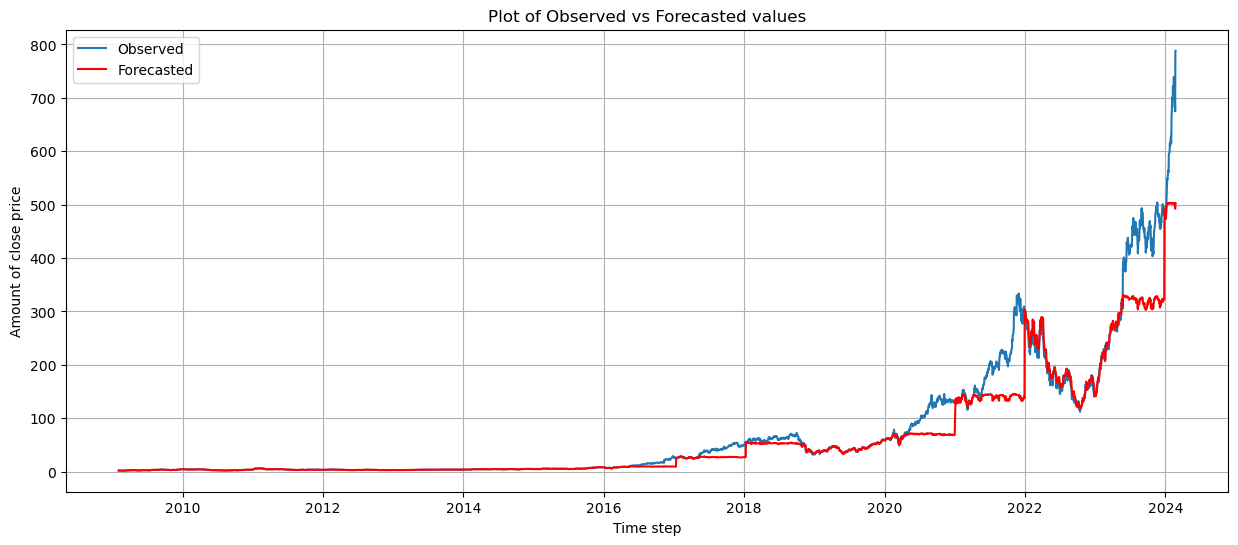

In [53]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(predictions_2['close'], label='Observed')
plt.plot(predictions_2['Predictions_2'], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

In [54]:
model_2.fit(train[predictors], train['close'])
prediction=model.predict(test[predictors])

In [55]:
mape= mean_absolute_percentage_error(test['close'], prediction)
mae=mean_absolute_error(test['close'], prediction)

In [56]:
print('mean absolute percentage error is : {}\n'.format(mape))
print('mean absolute  error is : {}\n'.format(mae))

mean absolute percentage error is : 0.6005486421543951

mean absolute  error is : 163.05439679612078



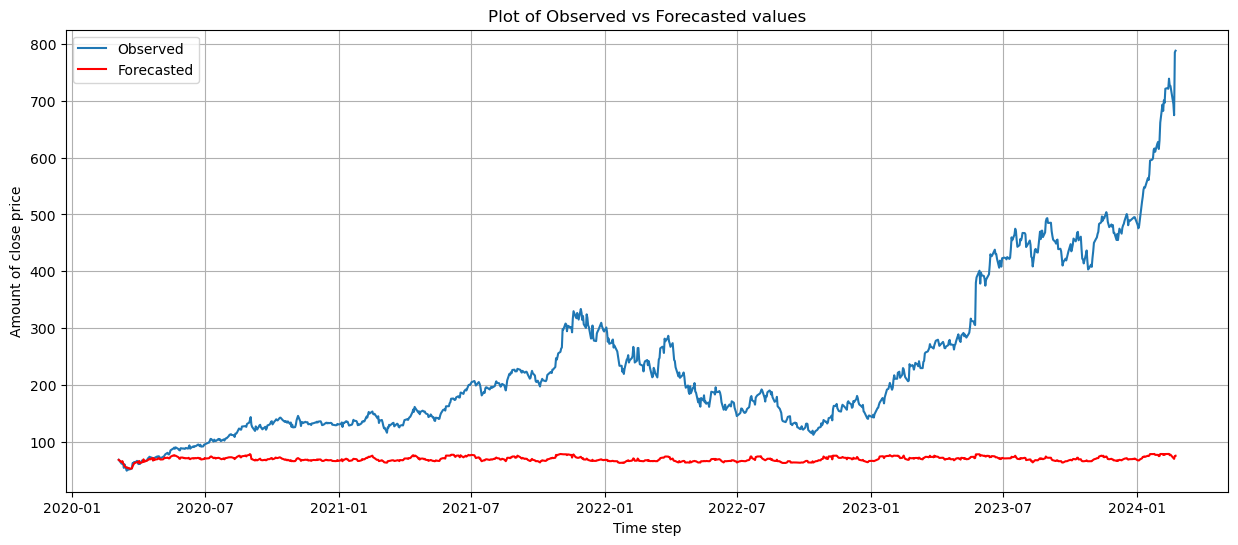

In [57]:
# Plot the test predictions and true values
pred= pd.Series(prediction, index=test.index)
plt.figure(figsize=(15,6))
plt.plot(test['close'], label='Observed')
plt.plot(pred, color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

#### Perform Hyper parameter tuning using grid searchcv

#possibe hyperparameters for random forest
hyper = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 6]
}

from sklearn.model_selection import GridSearchCV

cv_model= GridSearchCV(GradientBoostingRegressor(), param_grid=hyper)
cv_model.fit(train[predictors], train['close'])

print(cv_model.best_score_)
print(cv_model.best_estimator_)

In [58]:
model = GradientBoostingRegressor(max_depth=5, n_estimators=100, learning_rate=0.1, min_samples_split=5)
model.fit(train[predictors], train['close'])
prediction=model.predict(test[predictors])

In [59]:
grdb_mae =  mean_absolute_error(test['close'], prediction)
abs_errors= np.abs(np.array(prediction) - np.array(test['close']))
grdb_min_abs_errors= np.min(abs_errors)
grdb_max_abs_errors= np.max(abs_errors)
grdb_med_abs_errors= np.median(abs_errors)
grdb_mape = mean_absolute_percentage_error(test['close'], prediction)

In [60]:
print(f"Optimized Gradient boosting Performance Metrics \n\n \
gradientboost Mae: {grdb_mae} \n \
gradientboost minae: {grdb_min_abs_errors} \n \
gradientboost maxae: {grdb_max_abs_errors} \n \
gradientboost medae: {grdb_med_abs_errors} \n \
gradientboost Mape: {grdb_mape} \n \
 \n\n <-------------------------------------------------->\n")

Optimized Gradient boosting Performance Metrics 

 gradientboost Mae: 162.27210714410356 
 gradientboost minae: 0.06965086409836374 
 gradientboost maxae: 715.8800708121084 
 gradientboost medae: 117.49816929791763 
 gradientboost Mape: 0.595683719999405 
  

 <-------------------------------------------------->



In [61]:
pred= pd.Series(prediction, index=test.index)
combined= pd.concat([test['close'], pred],axis=1)
combined 

,close,0
date,,
2020-03-05,68.322502,67.943593
2020-03-06,66.510002,67.062987
2020-03-09,61.360001,64.840998
2020-03-10,65.269997,64.293411
2020-03-11,61.617500,61.687151
...,...,...
2024-02-16,726.130005,75.073281
2024-02-20,694.520020,71.282536
2024-02-21,674.719971,69.968775


In [62]:
mape= mean_absolute_percentage_error(test['close'], prediction)
mae=mean_absolute_error(test['close'], prediction)

In [63]:
print('mean absolute percentage error is : {}\n'.format(mape))
print('mean absolute  error is : {}\n'.format(mae))

mean absolute percentage error is : 0.595683719999405

mean absolute  error is : 162.27210714410356



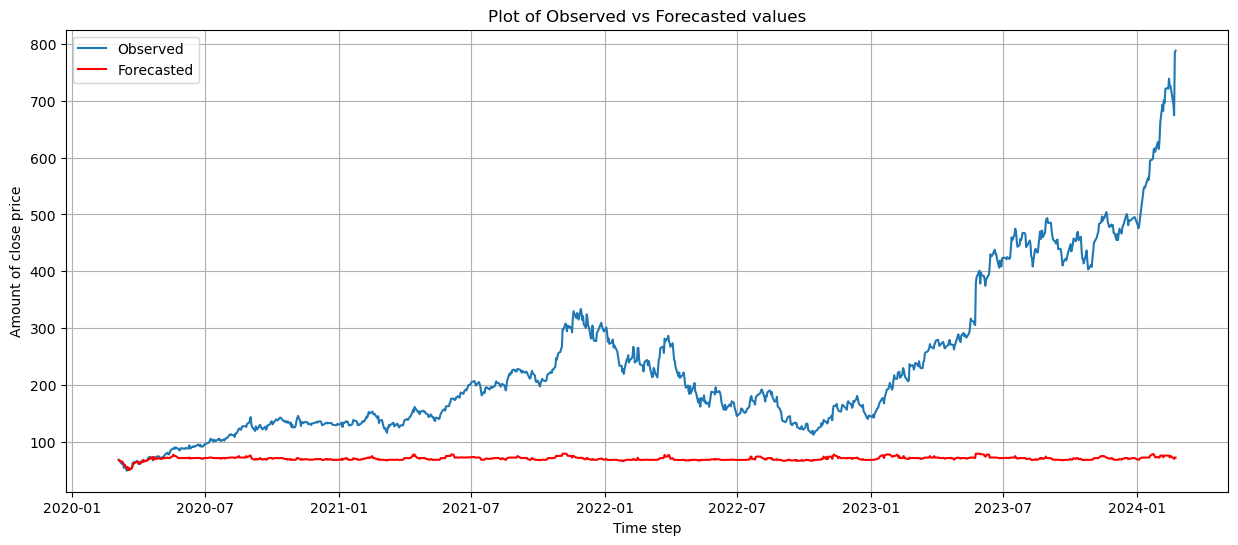

In [64]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined['close'], label='Observed')
plt.plot(combined[0], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

### Stacking and Bagging

In [65]:
# List of machine learning algorithms to consider
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso,ElasticNet 
algorithms = [
    ('Linear regression', LinearRegression(), {}),
    ('Ridge', Ridge(), {}),
    ('Lasso', Lasso(), {}),
    ('Elastic Net', ElasticNet(), {}),
    #('SVM', SVC(kernel='linear', probability=True, decision_function_shape='ovr'), {}),
    ('MLP', MLPRegressor(), {})
]

# Train base models
base_models = {}
for algorithm_name, algorithm, _ in algorithms:
    print(algorithm)
    model = algorithm
    model.fit(train[predictors], train['close'])
    base_models[algorithm_name] = model

eval_metrics = ['mae', 'mape']
results = pd.DataFrame(columns=['Algorithm'] + eval_metrics)

for algorithm_name, model in base_models.items():
    y_pred = model.predict(test[predictors])
    mae= mean_absolute_error(test['close'], y_pred)
    mape =mean_absolute_percentage_error(test['close'], y_pred)

# Ensembling using Bagging with all base models
bagging_model = BaggingRegressor(base_estimator=None, n_estimators=10, random_state=42)
bagging_model.fit(train[predictors], train['close'])
bagging_y_pred = bagging_model.predict(test[predictors])
bagging_mae = mean_absolute_error(test['close'], bagging_y_pred)
abs_errors= np.abs(np.array(bagging_y_pred) - np.array(test['close']))
bagg_min_abs_errors= np.min(abs_errors)
bagg_max_abs_errors= np.max(abs_errors)
bagg_med_abs_errors= np.median(abs_errors)
bagging_mape = mean_absolute_percentage_error(test['close'], bagging_y_pred)
print(f"Bagging Ensemble Method Performance Metrics \n\n \
bagging Mae: {bagging_mae} \n \
bagging minae: {bagg_min_abs_errors} \n \
bagging maxae: {bagg_max_abs_errors} \n \
bagging medae: {bagg_med_abs_errors} \n \
bagging Mape: {bagging_mape} \n \
 \n\n <-------------------------------------------------->\n")

# Ensembling using Stacking
meta_model = Ridge()
stacking_model = StackingRegressor(estimators=list(base_models.items()), final_estimator=meta_model)
stacking_model.fit(train[predictors], train['close'])
stacking_y_pred = stacking_model.predict(test[predictors])
stacking_mae =  mean_absolute_error(test['close'], stacking_y_pred)
abs_errors= np.abs(np.array(stacking_y_pred) - np.array(test['close']))
stack_min_abs_errors= np.min(abs_errors)
stack_max_abs_errors= np.max(abs_errors)
stack_med_abs_errors= np.median(abs_errors)
stacking_mape = mean_absolute_percentage_error(test['close'], stacking_y_pred)
print(f"Stacking Ensemble Method Performance Metrics \n\n \
stacking mae: {stacking_mae} \n \
stacking minae: {stack_min_abs_errors} \n \
stacking maxae: {stack_max_abs_errors} \n \
stacking medae: {stack_med_abs_errors} \n \
stacking mape: {stacking_mape} \n")




#print(f"Stacking F1 Score: {stacking_f1}")


LinearRegression()
Ridge()
Lasso()
ElasticNet()
MLPRegressor()
Bagging Ensemble Method Performance Metrics 

 bagging Mae: 162.396459062 
 bagging minae: 0.006748299999998153 
 bagging maxae: 716.5687301 
 bagging medae: 117.45949685 
 bagging Mape: 0.5960412892788381 
  

 <-------------------------------------------------->

Stacking Ensemble Method Performance Metrics 

 stacking mae: 3.384052037945622 
 stacking minae: 0.0009776147784350542 
 stacking maxae: 50.02371096233253 
 stacking medae: 2.3183919100386277 
 stacking mape: 0.01529870749037195 



In [66]:
bagging_y_pred= pd.Series(bagging_y_pred, index=test.index)
stacking_y_pred= pd.Series(stacking_y_pred, index=test.index)

In [67]:
combined_stack= pd.concat([test['close'], stacking_y_pred],axis=1)
combined_bagg= pd.concat([test['close'], bagging_y_pred], axis=1)

In [68]:
combined_bagg.head()

,close,0
date,,
2020-03-05,68.322502,67.896750
2020-03-06,66.510002,66.648250
2020-03-09,61.360001,66.077752
2020-03-10,65.269997,62.903001
2020-03-11,61.617500,61.680000


In [69]:
combined_stack

,close,0
date,,
2020-03-05,68.322502,66.403555
2020-03-06,66.510002,70.044450
2020-03-09,61.360001,62.036265
2020-03-10,65.269997,65.509589
2020-03-11,61.617500,58.996223
...,...,...
2024-02-16,726.130005,735.409231
2024-02-20,694.520020,693.517437
2024-02-21,674.719971,686.826202


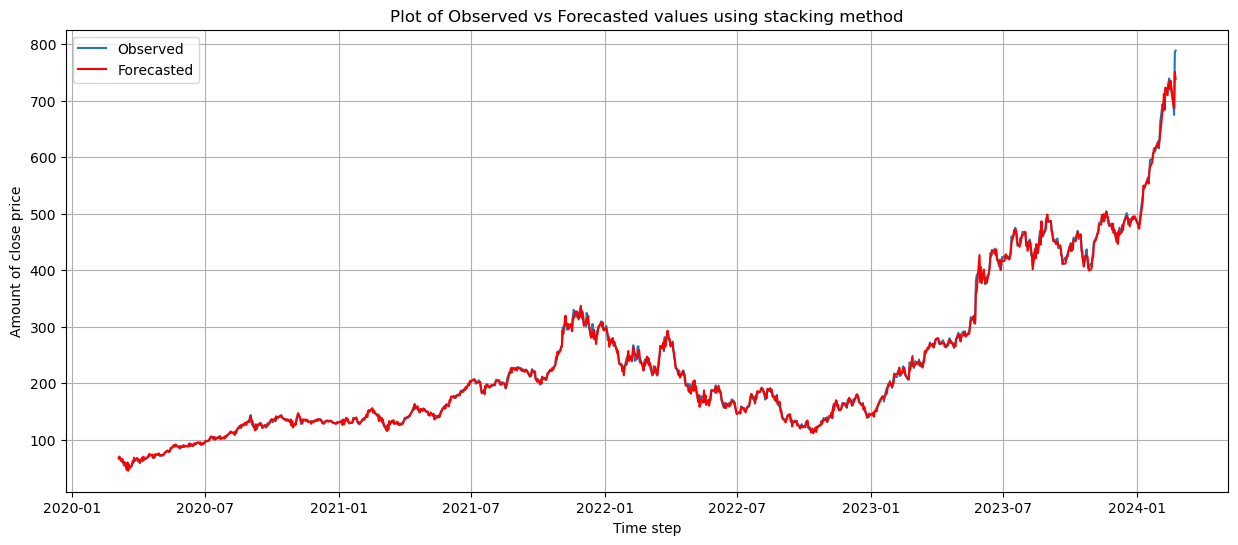

In [70]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined_stack['close'], label='Observed')
plt.plot(combined_stack[0], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values using stacking method')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

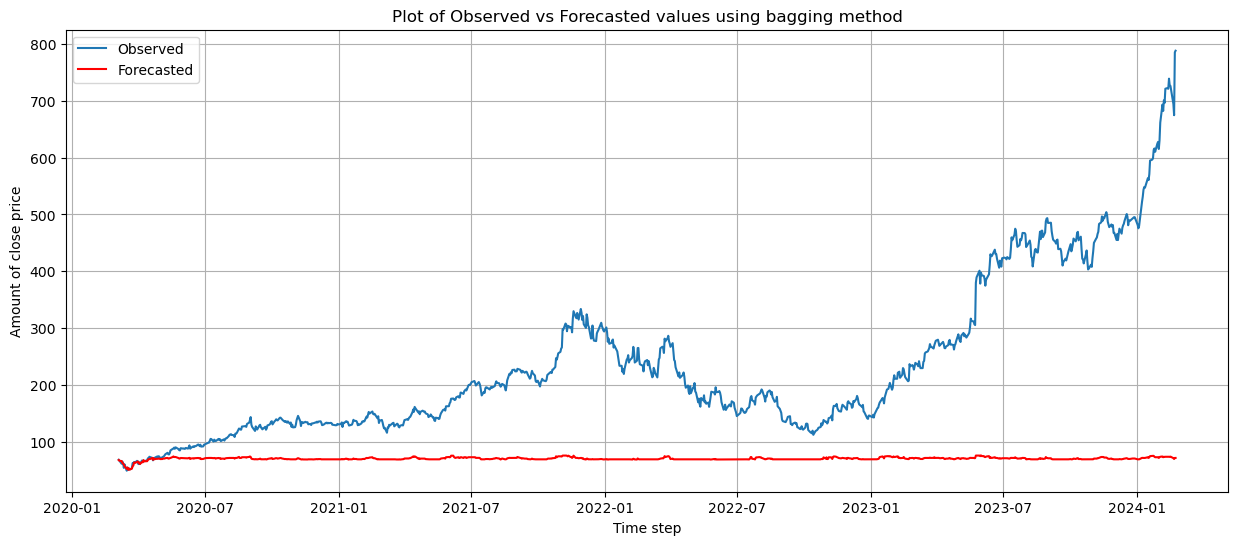

In [71]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined_bagg['close'], label='Observed')
plt.plot(combined_bagg[0], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values using bagging method')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

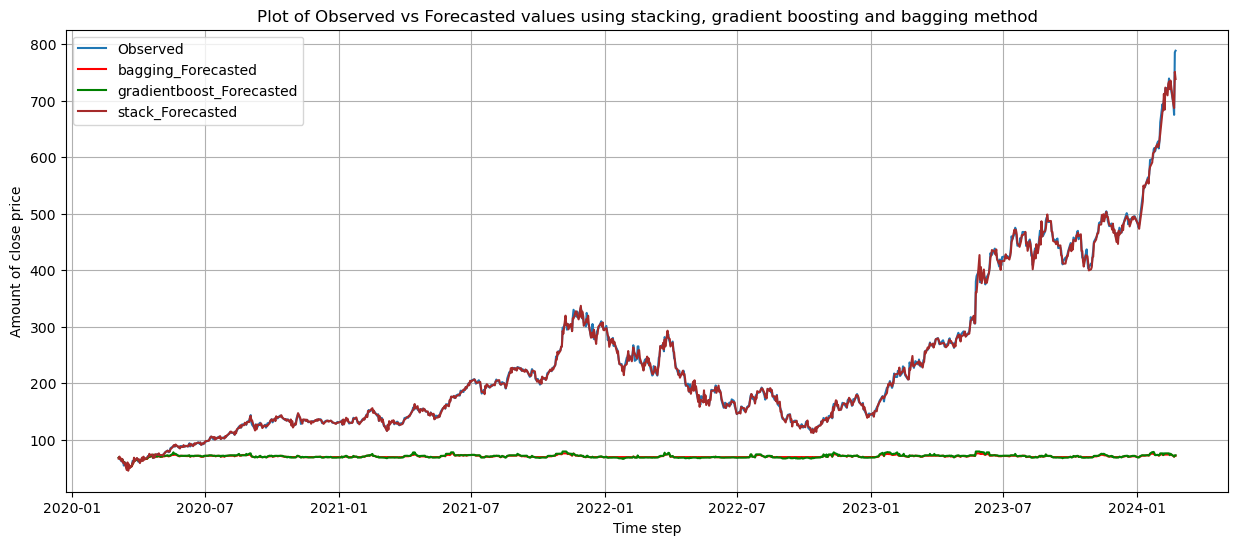

In [72]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined_bagg['close'], label='Observed')
plt.plot(combined_bagg[0], color='r', label='bagging_Forecasted')
plt.plot(combined[0], color='green', label='gradientboost_Forecasted')
plt.plot(combined_stack[0], color='brown', label='stack_Forecasted')
plt.title('Plot of Observed vs Forecasted values using stacking, gradient boosting and bagging method')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('Nvidiaresult.png')
plt.show()

In [73]:
from prettytable import PrettyTable
import joblib
import os
# Constructing the result summary table containing the scores for each model on  test dataset.

task1_result = PrettyTable()
task1_result.field_names = ["Regressor", "MAE on Test","MAPE on Test", "MinAE on Test", "MaxAE on Test", "MedAE on Test"]
task1_result.add_row(['RF Reg', 161.65, 0.59, 0.01, 715.66, 116.61])
task1_result.add_row(['XGboost', 163.25, 0.60, 0.07, 716.68, 118.51])
task1_result.add_row(['GradientBoost', 162.47, 0.60, 0.12, 716.24, 117.45])
task1_result.add_row(['Catboost', 163.05, 0.60, 0.02, 712.72, 117.56])
task1_result.add_row(['Bagging', 162.40, 0.60, 0.02, 712.72, 117.56])
task1_result.add_row(['Stacking', 3.74, 0.02, 0.00, 54.82, 2.53])

print('Result Summary for All Regressors :')
print(task1_result)

Result Summary for All Regressors :
+---------------+-------------+--------------+---------------+---------------+---------------+
|   Regressor   | MAE on Test | MAPE on Test | MinAE on Test | MaxAE on Test | MedAE on Test |
+---------------+-------------+--------------+---------------+---------------+---------------+
|     RF Reg    |    161.65   |     0.59     |      0.01     |     715.66    |     116.61    |
|    XGboost    |    163.25   |     0.6      |      0.07     |     716.68    |     118.51    |
| GradientBoost |    162.47   |     0.6      |      0.12     |     716.24    |     117.45    |
|    Catboost   |    163.05   |     0.6      |      0.02     |     712.72    |     117.56    |
|    Bagging    |    162.4    |     0.6      |      0.02     |     712.72    |     117.56    |
|    Stacking   |     3.74    |     0.02     |      0.0      |     54.82     |      2.53     |
+---------------+-------------+--------------+---------------+---------------+---------------+
